# Deep Learning Project - Image Classification using CNN


## 1. Introduction
In this project, we will build a Convolutional Neural Network (CNN) to classify images from the CIFAR-10 dataset. The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 different classes. A CNN is an excellent choice for image classification tasks due to its ability to capture spatial hierarchies in images.


In [1]:

# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


## 2. Load and Visualize the Dataset

170498071/170498071 [==============================] - 878s 5us/step


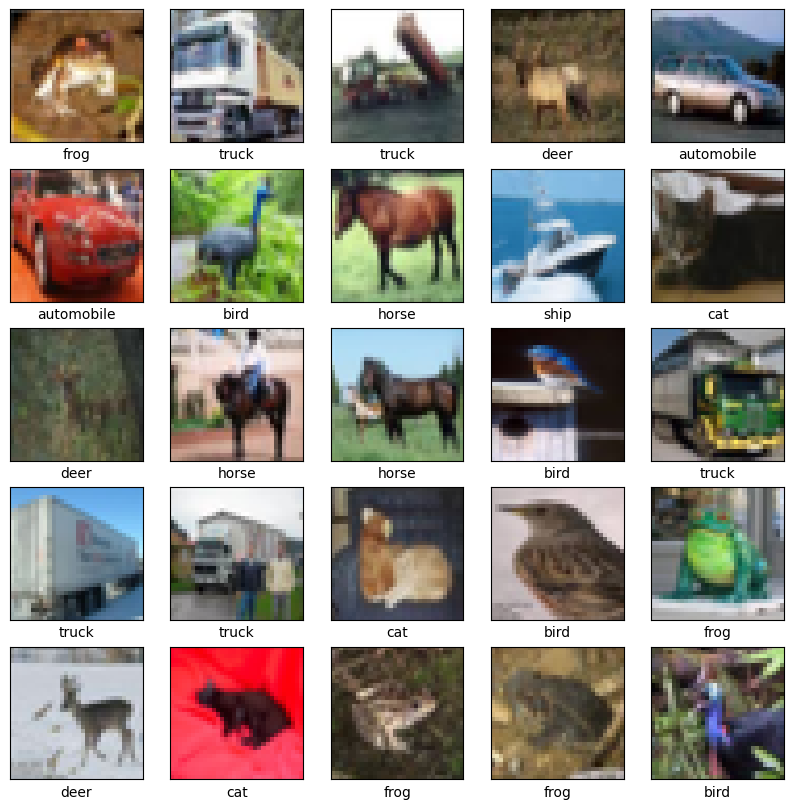

In [2]:

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Class names for CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Visualize some sample images
def plot_sample_images():
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X_train[i])
        plt.xlabel(class_names[y_train[i][0]])
    plt.show()

plot_sample_images()


## 3. Data Preprocessing

In [3]:

# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

# One-hot encode target labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [5]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

## 4. CNN Model Architecture

In [7]:

# Building the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

## 5. Compile and Train the Model

In [8]:

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))


Epoch 1/10
1563/1563 [==============================] - 94s 57ms/step - loss: 1.4688 - accuracy: 0.4661 - val_loss: 1.2220 - val_accuracy: 0.5629
Epoch 2/10
1563/1563 [==============================] - 99s 63ms/step - loss: 1.1140 - accuracy: 0.6076 - val_loss: 1.0939 - val_accuracy: 0.6178
Epoch 3/10
1563/1563 [==============================] - 91s 58ms/step - loss: 0.9675 - accuracy: 0.6617 - val_loss: 0.9253 - val_accuracy: 0.6734
Epoch 4/10
1563/1563 [==============================] - 86s 55ms/step - loss: 0.8697 - accuracy: 0.6957 - val_loss: 0.9169 - val_accuracy: 0.6783
Epoch 5/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.7918 - accuracy: 0.7238 - val_loss: 0.9414 - val_accuracy: 0.6800
Epoch 6/10
1563/1563 [==============================] - 85s 55ms/step - loss: 0.7379 - accuracy: 0.7433 - val_loss: 0.9340 - val_accuracy: 0.6831
Epoch 7/10
1563/1563 [==============================] - 98s 63ms/step - loss: 0.6828 - accuracy: 0.7632 - val_loss: 0.8830 -

## 6. Evaluate the Model

In [9]:

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")


313/313 [==============================] - 4s 14ms/step - loss: 0.9309 - accuracy: 0.7061
Test accuracy: 0.7060999870300293


## 7. Plot Training Accuracy and Loss

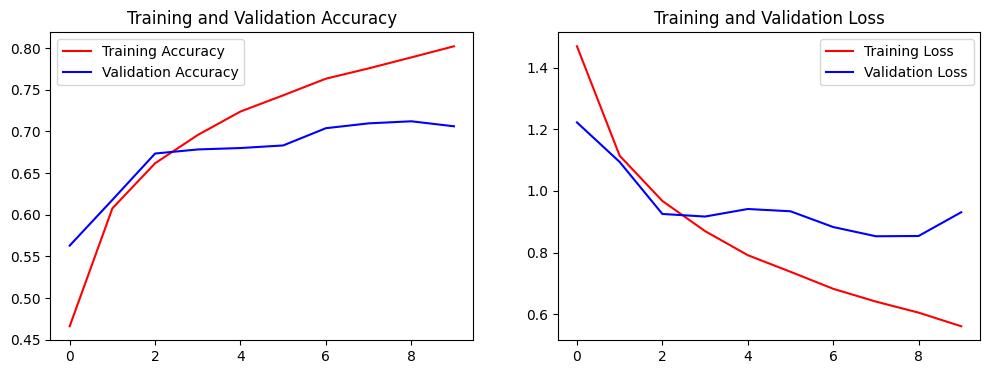

In [10]:

# Function to plot training and validation accuracy/loss
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'r', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    
    plt.show()

# Plot training history
plot_training_history(history)


## 8. Confusion Matrix

313/313 [==============================] - 4s 11ms/step


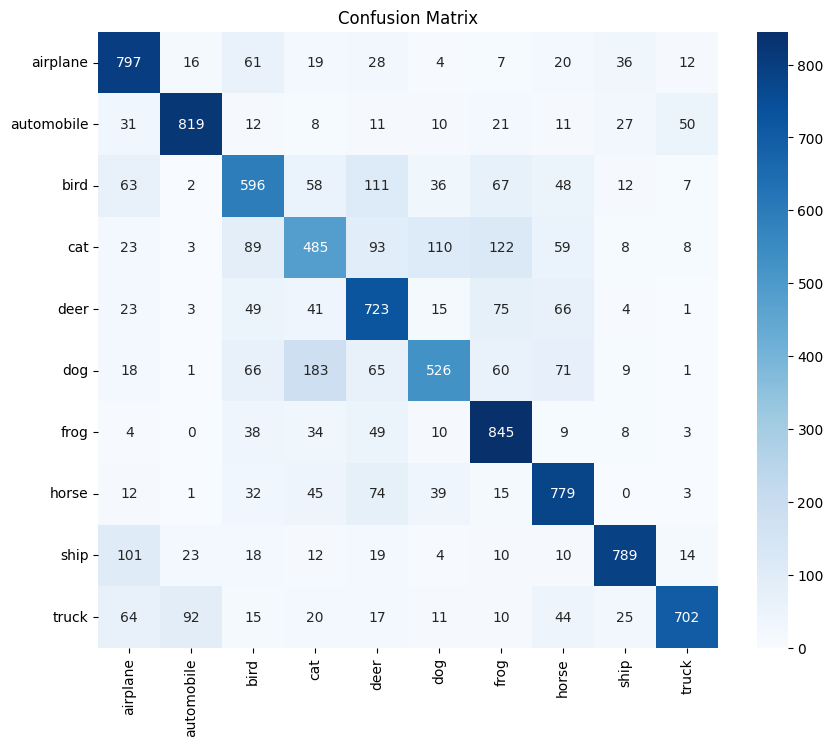

In [11]:

# Generate predictions and confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.show()


## 9. Save the Model

In [12]:

# Save the trained model to a file
model.save('cnn_image_classifier.h5')
